In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [6]:
df.shape

(2200, 8)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop=df.iloc[:,:-1]
corr=crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [10]:
!pip install seaborn
import seaborn as sns

<Axes: >

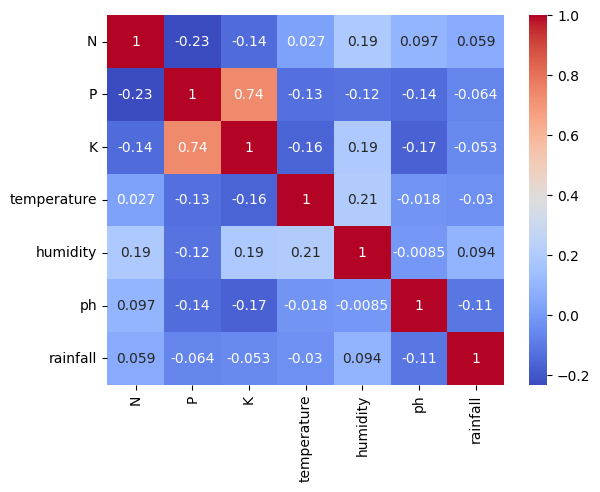

In [11]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [12]:
crop_dict = {
    "rice": 1,
    "maize": 2,
    "chickpea": 3,
    "kidneybeans": 4,
    "pigeonpeas": 5,
    "mothbeans": 6,
    "mungbean": 7,
    "blackgram": 8,
    "lentil": 9,
    "pomegranate": 10,
    "banana": 11,
    "mango": 12,
    "grapes": 13,
    "watermelon": 14,
    "muskmelon": 15,
    "apple": 16,
    "orange": 17,
    "papaya": 18,
    "coconut": 19,
    "cotton": 20,
    "jute": 21,
    "coffee": 22
}
df['label']=df['label'].map(crop_dict)

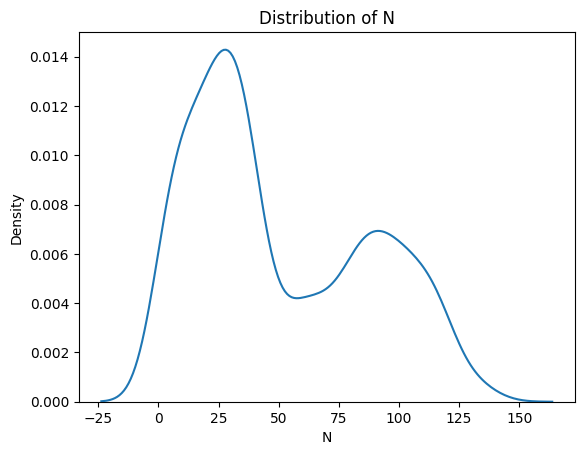

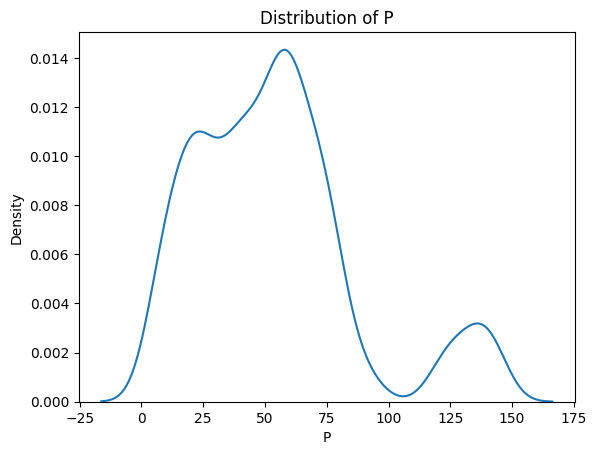

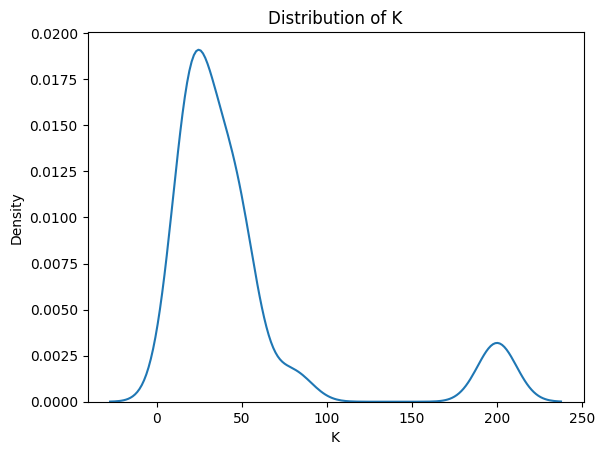

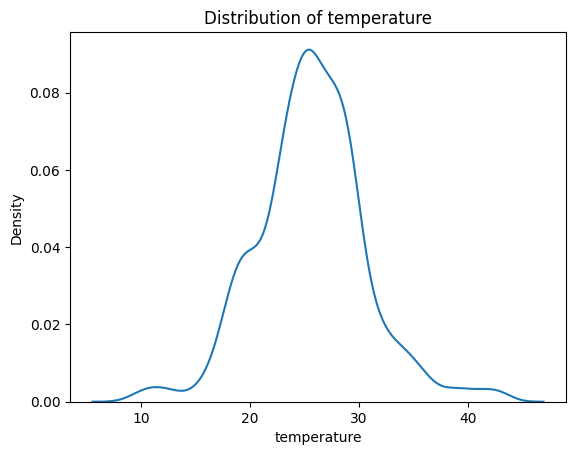

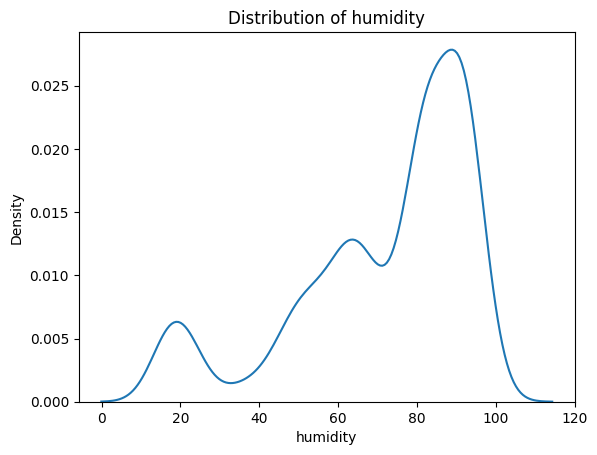

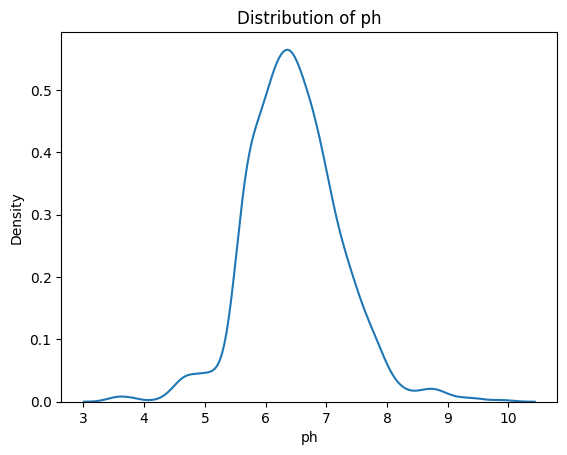

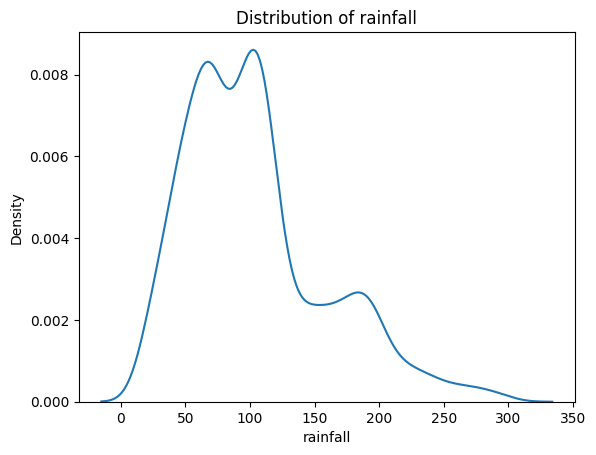

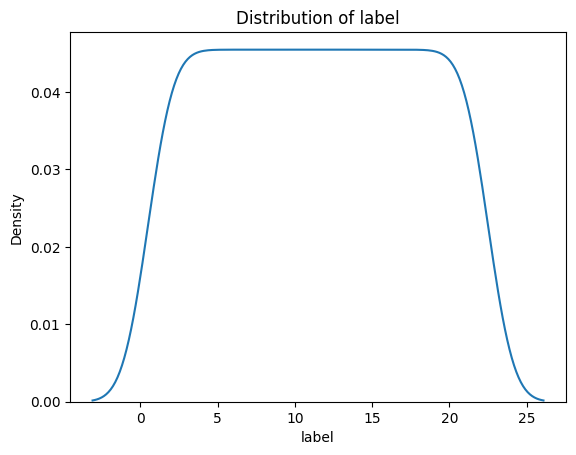

In [13]:

import matplotlib.pyplot as plt
for col in df.columns:
    sns.kdeplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

### Encoding

In [14]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1753,49,54,50,25.624466,93.182403,6.762522,97.263367,18
972,18,21,35,23.280123,94.943305,6.368561,111.138210,10
44,85,52,45,26.313555,82.366990,7.224286,265.535594,1
1494,89,25,50,27.048635,91.346851,6.375923,25.081467,15
1350,97,25,50,26.220060,80.901270,6.093815,49.085539,14


In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x.shape

(2200, 7)

In [17]:
y.shape

(2200,)

In [18]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [20]:
y_train

1656    17
752      8
892      9
1041    11
1179    12
        ..
1638    17
1095    11
1130    12
1294    13
860      9
Name: label, Length: 1760, dtype: int64

### Scaling

In [21]:

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier,
    GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.metrics import classification_report, accuracy_score
models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='saga', max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', gamma='scale'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, criterion='gini'),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, max_depth=20),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15),
    'Bagging': BaggingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}


print("🔍 Training and Evaluating Models with Manual Hyperparameters...\n")

for name, model in models.items():
    model.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(x_train))
    test_acc = accuracy_score(y_test, model.predict(x_test))

    print(f"➡️  {name}")
    print(f"   🧠 Training Accuracy: {train_acc:.4f}")
    print(f"   📊 Testing Accuracy:  {test_acc:.4f}")



🔍 Training and Evaluating Models with Manual Hyperparameters...

➡️  Logistic Regression
   🧠 Training Accuracy: 0.9477
   📊 Testing Accuracy:  0.9205
➡️  Naive Bayes
   🧠 Training Accuracy: 0.9949
   📊 Testing Accuracy:  0.9955


c:\Users\Aswin Kumar Nayak\OneDrive\Documents\Python_Frameworks\Flask\myenv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


➡️  Support Vector Machine
   🧠 Training Accuracy: 0.9852
   📊 Testing Accuracy:  0.9682
➡️  K-Nearest Neighbors
   🧠 Training Accuracy: 1.0000
   📊 Testing Accuracy:  0.9705
➡️  Decision Tree
   🧠 Training Accuracy: 0.9977
   📊 Testing Accuracy:  0.9864
➡️  Extra Trees
   🧠 Training Accuracy: 1.0000
   📊 Testing Accuracy:  0.9886
➡️  Random Forest
   🧠 Training Accuracy: 1.0000
   📊 Testing Accuracy:  0.9932
➡️  Bagging
   🧠 Training Accuracy: 1.0000
   📊 Testing Accuracy:  0.9909
➡️  AdaBoost
   🧠 Training Accuracy: 0.2790
   📊 Testing Accuracy:  0.2750
➡️  Gradient Boosting
   🧠 Training Accuracy: 1.0000
   📊 Testing Accuracy:  0.9818


In [25]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=15)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.9931818181818182


In [26]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
  

### Prediction


In [27]:
df.head()
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features=np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    scaled_features=scaler.transform(features)
    prediction=rfc.predict(scaled_features)
    #print(prediction)
    return prediction[0]

In [28]:
N=90
P=42
K=43
temperature=40.0
humidity=80.0
ph=7.0
rainfall=200.0

predict=recommendation(N,P,K,temperature,humidity,ph,rainfall)
#print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict in crop_dict:
    crop=crop_dict[predict]
    print(f"{crop} is a best crop to be cultivated")
else:
    print("No proper crop to be recommended")




Chickpea is a best crop to be cultivated


c:\Users\Aswin Kumar Nayak\OneDrive\Documents\Python_Frameworks\Flask\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [29]:
import joblib
joblib.dump(rfc, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [30]:
model = joblib.load("model.joblib")
sample = [[19,	65,	25,	18.095510	,18.293184,	5.625096,	144.790232]]
rescaled_sample = scaler.transform(sample)
print("Predicted class:", model.predict(rescaled_sample))


Predicted class: [4]


c:\Users\Aswin Kumar Nayak\OneDrive\Documents\Python_Frameworks\Flask\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
